<a href="https://colab.research.google.com/github/curtiscu/LYIT/blob/master/ML_Models_2020_08_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup env


In [1]:
# print all cell output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Google drive access

In [2]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
# test, peek at data
! ls -al '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/'

# test, modules from local  'E:\Google Drive\LYIT\Dissertation\modules'
! ls -al '/content/drive/My Drive/LYIT/Dissertation/modules/'

total 35
-rw------- 1 root root 2589 Apr 27 12:01 10_soul-groove10_102_beat_4-4.mid
-rw------- 1 root root 4793 Apr 27 12:01 1_funk-groove1_138_beat_4-4.mid
-rw------- 1 root root 3243 Apr 27 12:01 2_funk-groove2_105_beat_4-4.mid
-rw------- 1 root root 4466 Apr 27 12:01 3_soul-groove3_86_beat_4-4.mid
-rw------- 1 root root 2551 Apr 27 12:01 4_soul-groove4_80_beat_4-4.mid
-rw------- 1 root root 3798 Apr 27 12:01 5_funk-groove5_84_beat_4-4.mid
-rw------- 1 root root 3760 Apr 27 12:01 6_hiphop-groove6_87_beat_4-4.mid
-rw------- 1 root root 1894 Apr 27 12:01 7_pop-groove7_138_beat_4-4.mid
-rw------- 1 root root 2437 Apr 27 12:01 8_rock-groove8_65_beat_4-4.mid
-rw------- 1 root root 3448 Apr 27 12:01 9_soul-groove9_105_beat_4-4.mid
total 49
-rw------- 1 root root 28586 Aug 18 21:35 data_prep.py
drwx------ 2 root root  4096 May 10 13:31 __pycache__
-rw------- 1 root root  7847 Aug 18 22:09 stats_n_features.py
-rw------- 1 root root  8459 Aug 18 22:03 visualizations.py


## Auto reload module

Now using library code I've created and saved to google drive which is automatically pushed to the cloud and made available to the colab env. The autoreload stuff below should help imports to 'reimport' to load changes to the library code.

It's not the quickest/ most reliable, so if in a hurry, brute force loading of changes by restarting the runtime.

In [4]:
# tool to auto reload modules.
%load_ext autoreload

# config to auto-reload all modules, handy to make 
# writing and testing modules much easier.
%autoreload 2

## Imports and accessing lib functions

In [5]:
# install required libs
!pip install mido

In [6]:
# import my modules
import sys
sys.path.append('/content/drive/My Drive/LYIT/Dissertation/modules/')
import data_prep as dp

>> LOADING custom module, when: 2020-08-31 18:59:32.922467, module name: stats_n_features
>> LOADING custom module, when: 2020-08-31 18:59:32.923367, module name: data_prep


In [7]:
# imports
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


# object that provides colours for charts
from itertools import cycle



In [8]:
# testing auto reload of modules 
dp.test_function_call('bling')

Test function in data_prep.py called and worked! when: 2020-08-31 18:59:32.968507,  param:bling


In [9]:
import stats_n_features as sf

In [10]:
sf.test_function_call('hello')

Test function in stats_n_features called and worked! when: 2020-08-31 18:59:33.011648,  param:hello


## Pandas display options

In [11]:
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 2000
    display.max_colwidth = 1000
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()
#pd.reset_option('all')


# Load single file

In [12]:
test_1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid'

# Test latest loading code

Loading code now pulls everything into dict of structures with the following layout ..
* PerformanceData = namedtuple('PerformanceData' , 'drummer_id file_df file_wrapper tools stats_df tight_df')

In [13]:
#dp.load_meta_file()

In [14]:
my_data = dp.load_all_data()

BULK LOAD: drummer1, drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
FILE name: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
    loaded file: <midi file '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid' type 0, 1 tracks, 1300 messages>
    time sig: <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
    tempo: <meta message set_tempo tempo=434783 time=0>
    track count: 1, tracks: [<midi track 'MIDI' 1300 messages>]
    MIDI file type: 0
    > processing track: <midi track 'MIDI' 1300 messages>
    __notes pre-filter: [36. 37. 38. 40. 43. 44. 51. 52. 53. 55.]
    __applying filter: [44]
    __notes post filter: [36. 37. 38. 40. 43. 51. 52. 53. 55.]
    note_on span - first tick: 3 , last tick: 30658 
    good instruments: 5, {36.0: 'Bass Drum 1 (36)', 38.0: 'Acoustic Snare (38)', 43.0: 'High Floor

In [15]:
all_drummer_data = my_data

style_filter = "1_funk-groove1"  # first style to experiment with

for next_file in all_drummer_data.keys():
  perf_data = all_drummer_data[next_file]
  file_name = perf_data.file_wrapper.my_file_name
  if style_filter in file_name:
    print('DrummerID: {}'.format(perf_data.drummer_id))
    print('File: {}'.format(file_name))
    display(perf_data.tight_df.head(5))
    #display(perf_data.stats_df)

DrummerID: drummer1
File: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                              
1          1                  hh        55            7                1
           1                kick        64           10                1
           3                kick        57          -29                3
           3                  hh        31           -2                3
           5                  hh        54          -13                5

DrummerID: drummer5
File: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                              
1          1                kick        39            9                1
           1                  hh        67           15                1
           3                kick        41          -14                3
           3                  hh        58           18                3
           4                kick         6          -16                4

DrummerID: drummer7
File: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                               
1          1                 kick        47            0                1
           1                   hh       113            0                1
           3                   hh        55            1                3
           3                 kick        43            5                3
           5                snare       108           25                5

DrummerID: drummer8
File: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer8/eval_session/1_funk-groove1_138_beat_4-4.mid


note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                              
1          1                kick        67            0                1
           1                  hh        40            0                1
           3                kick        64          -30                3
           3                  hh        37          -12                3
           5                  hh        83          -12                5

# Pick out a file, or two

In [16]:
# experimenting on a single file here ...
key1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid'
key2 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid'


test_data = all_drummer_data[key1]
df1 = test_data.tight_df.copy()

df2 = test_data = all_drummer_data[key2].tight_df.copy()


In [17]:
df1.head()
df2.head()

note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                              
1          1                  hh        55            7                1
           1                kick        64           10                1
           3                kick        57          -29                3
           3                  hh        31           -2                3
           5                  hh        54          -13                5

note  velocity  beat_offset  bar_beat_number
bar_number bar_beat_number                                              
1          1                kick        39            9                1
           1                  hh        67           15                1
           3                kick        41          -14                3
           3                  hh        58           18                3
           4                kick         6          -16                4

## Pull out notes in 1st bar
Using technique from..
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html

In [18]:
# pull out notes in 1st bar
display(df1.xs(9, level='bar_number')) 

,note,velocity,beat_offset,bar_beat_number
bar_beat_number,,,,
1,kick,60,-25,1
1,hh,54,-11,1
1,snare,33,47,1
3,kick,60,-25,3
3,hh,38,-17,3
5,snare,97,-20,5
5,hh,70,-17,5
7,hh,38,-8,7
8,snare,99,-16,8


# Descriptive statistics

Check out..
* https://realpython.com/python-statistics/#measures-of-central-tendency


## Summary metrics by instrument

In [19]:
print(' stats for: {}'.format(key1))
df1.describe()
#df1.groupby(['bar_beat_number', 'note'])['beat_offset'].count()
print(' stats for: {}'.format(key2))
df2.describe()

 stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid


,velocity,beat_offset,bar_beat_number
count,259.000000,259.000000,259.000000
mean,59.023166,-8.382239,7.528958
std,23.861508,16.705284,4.585338
min,8.000000,-58.000000,1.000000
25%,44.000000,-17.000000,3.000000
50%,52.000000,-7.000000,8.000000
75%,65.500000,1.500000,11.000000
max,127.000000,55.000000,16.000000


 stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid


,velocity,beat_offset,bar_beat_number
count,297.000000,297.000000,297.000000
mean,57.993266,8.774411,8.124579
std,30.944260,18.573438,4.639137
min,6.000000,-58.000000,1.000000
25%,40.000000,-4.000000,3.000000
50%,46.000000,11.000000,9.000000
75%,74.000000,22.000000,12.000000
max,127.000000,46.000000,16.000000


## Variance metrics

In [20]:
import statistics
print('variance stats for: {}'.format(key1))
print('  vel: {}'.format(statistics.variance(df1.velocity)))
print('  off: {}'.format(statistics.variance(df1.beat_offset)))


print('variance stats for: {}'.format(key2))
print('  vel: {}'.format(statistics.variance(df2.velocity)))
print('  off: {}'.format(statistics.variance(df2.beat_offset)))


variance stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
  vel: 569.371554278531
  off: 279.0665050432492
variance stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid
  vel: 957.5472517972518
  off: 344.9725862225862


# Metrics grouped by instrument

Seaborn, boxplot type stuffs...
* https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/
* https://seaborn.pydata.org/generated/seaborn.stripplot.html
* https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/
* https://plotnine.readthedocs.io/en/stable/index.html
* https://www.kaggle.com/residentmario/grammar-of-graphics-with-plotnine-optional/
* https://www.dummies.com/education/math/statistics/what-a-boxplot-can-tell-you-about-a-statistical-data-set/

.. and stuff to consider when creating boxplots...
* https://www.data-to-viz.com/caveat/boxplot.html

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
print('stats for: {}'.format(key1))
df1['beat_offset'].groupby(df1['note']).describe()
df1['velocity'].groupby(df1['note']).describe()

stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,126.0,-4.674603,13.097071,-41.0,-12.00,-3.5,4.0,27.0
kick,54.0,-14.777778,15.486655,-54.0,-24.75,-13.0,-4.0,10.0
snare,79.0,-9.924051,20.791253,-58.0,-21.00,-8.0,0.5,55.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,126.0,50.436508,9.891003,30.0,44.0,49.0,56.00,83.0
kick,54.0,60.796296,15.543463,42.0,52.0,59.5,63.75,127.0
snare,79.0,71.506329,35.822523,8.0,33.0,90.0,102.00,117.0


In [23]:
print('stats for: {}'.format(key2))
df2['beat_offset'].groupby(df2['note']).describe()
df2['velocity'].groupby(df2['note']).describe()

stats for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,128.0,15.640625,15.394924,-31.0,6.0,19.0,26.00,46.0
kick,68.0,-3.985294,17.289884,-49.0,-14.0,-4.5,8.25,35.0
snare,101.0,8.663366,18.675266,-58.0,-2.0,11.0,22.00,38.0


,count,mean,std,min,25%,50%,75%,max
note,,,,,,,,
hh,128.0,67.437500,25.019284,33.0,48.0,59.0,82.25,125.0
kick,68.0,31.955882,12.393347,6.0,21.0,36.0,43.00,48.0
snare,101.0,63.554455,36.469844,10.0,39.0,46.0,105.00,127.0


# Imports

In [24]:
# Do our imports

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler


# Util methods for GetDummies, OneHot, adding label, etc.

In [25]:

def getDummies(df):
  '''
  Takes as input data_prep.PerformanceData.tight_df

  Returns df with additional colums for getDummies/ 1-hot encoding of instrument & note
  getDummies/ 1-hot encoding of instrument & note position (bucket)
  '''
  tmp_df = df.copy()

  #### get dummies/ one-hot

  # join the new columns with  original dataframe
  tmp_df = pd.concat([tmp_df,pd.get_dummies(tmp_df.note, prefix='note', drop_first=True)],axis=1)
  #tmp_df.drop('note',axis=1, inplace=True)  # drop original 'note' col

  tmp_df = pd.concat([tmp_df,pd.get_dummies(tmp_df.bar_beat_number, prefix='beat', drop_first=True)],axis=1)
  #tmp_df.drop('bar_beat_number',axis=1, inplace=True)  # drop original 'bar_beat_number' col

  return tmp_df


def getScaling(df):
  '''
  Takes as input data_prep.PerformanceData.tight_df

  Returns df with additional colums for MinMax/Robust cols for velocity & offset
  '''

  tmp_df = df.copy()

  #### Velocity Scaling

  data = tmp_df.velocity
  x = data.values.reshape(-1, 1) #returns a numpy array

  # min/max scaling
  scaler = MinMaxScaler(feature_range=(0, 1))
  x_scaled = scaler.fit_transform(x)
  tmp_df['velocity_scaled'] = x_scaled

  # robust scaling
  x_scaled = RobustScaler(quantile_range=(25, 75)).fit_transform(x)
  tmp_df['velocity_scaled_r'] = x_scaled


  #### Offset Scaling

  data = tmp_df.beat_offset
  x = data.values.reshape(-1, 1) #returns a numpy array

  # min/max scaling
  scaler = MinMaxScaler(feature_range=(-0.5, 0.5))
  x_scaled = scaler.fit_transform(x)
  tmp_df['offset_scaled'] = x_scaled

  # robust
  x_scaled = RobustScaler(quantile_range=(25, 75)).fit_transform(x)
  tmp_df['offset_scaled_r'] = x_scaled

  # DEBUG compare MinMaxScaler & RobustScaler stats..
  #df.filter(items=['velocity_scaled', 'velocity_scaled_r', 'offset_scaled', 'offset_scaled_r']).describe()
  #df.head(20)

  return tmp_df


def addLabelCol(df, label):
  '''
  Takes as input data_prep.PerformanceData.tight_df

  Returns df with additional colum for Y/ label called 'drummer_ID'
  '''

  # df['drummer_ID'] = label
  df.insert(0, 'drummer_ID', label) # add it as first col

  return df



# Filter style, add Y labels, etc



In [26]:
# specify style being processed
# 1_funk-groove1
# 3_soul-groove3
# 4_soul-groove4
# 6_hiphop-groove6
# 8_rock-groove8

#style_filter = "1_funk-groove1"  
style_filter = "3_soul-groove3"
#style_filter = "4_soul-groove4"
#style_filter = "6_hiphop-groove6"
#style_filter = "8_rock-groove8"

songs_data = []


# iterate through loaded files, extract songs
# matching the style set in 'style_filter', then
# add the label/ Y col ..
for next_file in all_drummer_data.keys():
  perf_data = all_drummer_data[next_file]
  file_name = perf_data.file_wrapper.my_file_name
  if style_filter in file_name:
    print('Working on: {}'.format(file_name))
    df1 = perf_data.tight_df.copy()
    df2 = addLabelCol(df1, perf_data.drummer_id)  
    df2.reset_index(drop=True, inplace=True)
    songs_data.append(df2)
  else:
    print('  ... ignoring: {}'.format(file_name))

# merge all into single df, drop indexes, reset default index
all_data = pd.concat(songs_data)
all_data.reset_index(inplace=True, drop=True)


  ... ignoring: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
Working on: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/3_soul-groove3_86_beat_4-4.mid
  ... ignoring: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/4_soul-groove4_80_beat_4-4.mid
  ... ignoring: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/6_hiphop-groove6_87_beat_4-4.mid
  ... ignoring: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/8_rock-groove8_65_beat_4-4.mid
  ... ignoring: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid
Working on: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/3_soul-groove3_86_beat_4-4.mid
  ... ignoring: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/4_soul-groove4_80_beat_4-4.mid
  ... ignoring: /con

# Testing data - 'all_data'

Just a wee note to say I can get the loaded & labelled data in 'all_data' later in this notebook

In [54]:
all_data.head(10)

,drummer_ID,note,velocity,beat_offset,bar_beat_number
0,drummer1,hh,32,0,1
1,drummer1,kick,60,0,1
2,drummer1,snare,15,1,1
3,drummer1,hh,18,0,2
4,drummer1,hh,60,3,3
5,drummer1,hh,24,3,4
6,drummer1,kick,52,4,4
7,drummer1,snare,102,9,5
8,drummer1,hh,46,9,5
9,drummer1,hh,28,-2,6


# Feature transforms: dummies, scale data, merge all to single df

Excellent article on scaling/ normalising and the effect it has on data...
* https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [28]:

tmp_df_1 = getDummies(all_data)
tmp_df_2 = getScaling(tmp_df_1)
tmp_df_2.drop(['velocity','beat_offset','bar_beat_number', 'note'],axis=1, inplace=True)
data = tmp_df_2
data.head(10)
data.tail(10)


,drummer_ID,note_kick,note_snare,beat_2,beat_3,beat_4,beat_5,beat_6,beat_7,beat_8,beat_9,beat_10,beat_11,beat_12,beat_13,beat_14,beat_15,beat_16,velocity_scaled,velocity_scaled_r,offset_scaled,offset_scaled_r
0,drummer1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.221311,-0.272727,0.004202,0.600000
1,drummer1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450820,0.363636,0.004202,0.600000
2,drummer1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.081967,-0.659091,0.012605,0.666667
3,drummer1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.106557,-0.590909,0.004202,0.600000
4,drummer1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450820,0.363636,0.029412,0.800000
5,drummer1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.155738,-0.454545,0.029412,0.800000
6,drummer1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.385246,0.181818,0.037815,0.866667
7,drummer1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.795082,1.318182,0.079832,1.200000
8,drummer1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.336066,0.045455,0.079832,1.200000
9,drummer1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.188525,-0.363636,-0.012605,0.466667


,drummer_ID,note_kick,note_snare,beat_2,beat_3,beat_4,beat_5,beat_6,beat_7,beat_8,beat_9,beat_10,beat_11,beat_12,beat_13,beat_14,beat_15,beat_16,velocity_scaled,velocity_scaled_r,offset_scaled,offset_scaled_r
1667,drummer8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.893443,1.590909,-0.088235,-0.133333
1668,drummer8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.516393,0.545455,-0.029412,0.333333
1669,drummer8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.450820,0.363636,0.029412,0.800000
1670,drummer8,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.000000,1.886364,-0.079832,-0.066667
1671,drummer8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.000000,1.886364,-0.037815,0.266667
1672,drummer8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.475410,0.431818,-0.037815,0.266667
1673,drummer8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.819672,1.386364,-0.037815,0.266667
1674,drummer8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.901639,1.613636,-0.046218,0.200000
1675,drummer8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.327869,0.022727,-0.063025,0.066667
1676,drummer8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.426230,0.295455,-0.046218,0.200000


**Variations to try...**

* with MinMax scaled data
* with Robust scaled data


# Setup X, y

In [29]:
#data.head()

# extract the target/ class/ Y column
# data needs to be numpy array
y = data['drummer_ID'].to_numpy()

# filter/ drop cols, e.g. run with MinMax scaling so drop RobustScaling
# cols, plus the Y label that we shall be predicting ...
data.drop(['velocity_scaled_r', 'offset_scaled_r', 'drummer_ID' ], axis=1, inplace=True)

# data needs to be numpy array
X = data.to_numpy()

# X[:5, :] 


# ML models to try

There's a cheat sheet from Scikit learn with model suggestions ..

- https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Top_Python_Libraries_Used_In_Data%C2%A0Science.ipynb#4.-Building-the%C2%A0model

Understanding sklearn.classification_report....

* https://muthu.co/understanding-the-classification-report-in-sklearn/

# Train/ test split

Useful ...
* https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

Ways to do it ..

1) Split all data randomly

2) Take 3/4  of start of a track as train, last 1/4 as test




In [55]:
########################
##
## 1) Random data split
##
########################

# Test size specifies how much of the data you want to set aside for the testing set. 
# Random_state parameter is just a random seed we can use.
# You can use it if you'd like to reproduce these specific results.

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=27)


#print(X_train)  
#print(y_train)




# KNN

Just a wee reminder, some handy links


KNN tutorials, howtos, etc...
* [KNN in python from scratch](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

* https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm


Tutorial on manipulating MultiIndexes here ...
* https://github.com/ZaxR/pandas_multiindex_tutorial/blob/master/Pandas%20MultiIndex%20Tutorial.ipynb


Example using df.xs to extract info...
* display(multi_col_lvl_df.xs(('2018-07-10', 'Booooze', 'Wine'), level=['Date', 'Department', 'Category']).head(10))

Dataframe.xs (cross section) ...
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html


## Evaluate model, plot results

In [53]:

def KNN_predict(X_test, n=5):
  # Fit model, do predictions

  KNN_model = KNeighborsClassifier(n)
  display(KNN_model)
  KNN_model.fit(X_train, y_train)
  return KNN_model.predict(X_test)

def KNN_results(pred, test, labels):
  # evaluate results

  print('\nKNN Accuracy score...')
  print('  KNN: {}'.format(accuracy_score(pred, test)))

  print('\nKNN classification report...')
  print(classification_report(pred, test))

def c_matrix(pred, test, labels):
  # plot results

  print('\nConfusion matrix...')
  matrix2 = confusion_matrix(pred, test)
  m_df = pd.DataFrame(matrix2, index=labels, columns=labels)
  _ = plt.figure(figsize=(6, 6))
  sns.heatmap(m_df, annot=True, cbar=None, cmap="Reds")
  plt.title("Confusion Matrix")
  plt.tight_layout()
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.show()



In [56]:
# N_s = [1, 2, 5, 7, 9, 30]  # number of neighbors to test
N_s = [7]  # number of neighbors to test
preds = []  # store results

for i in N_s:
  print('predicting n = {}'.format(i))
  preds.append((i, KNN_predict(X_test, i) ))


predicting n = 7


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


_______________________________________________________

>> NEIGBORS = 7

KNN Accuracy score...
  KNN: 0.6994047619047619

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.76      0.65      0.70       109
    drummer5       0.70      0.64      0.67        90
    drummer7       0.52      0.78      0.62        59
    drummer8       0.86      0.77      0.81        78

    accuracy                           0.70       336
   macro avg       0.71      0.71      0.70       336
weighted avg       0.72      0.70      0.70       336


Confusion matrix...


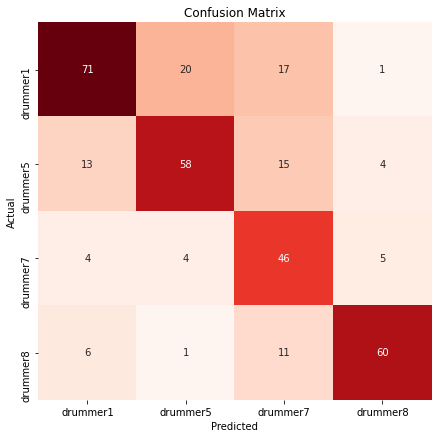

In [57]:
# view results

classes = np.unique(y)

for i, p in preds:
  print("\n_______________________________________________________")
  print("\n>> NEIGBORS = {}".format(i))
  KNN_results(p, y_test, classes)
  c_matrix(p, y_test, classes)

## Testing different neighbors values

Run bulk test on lots of neighbours, see...

* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

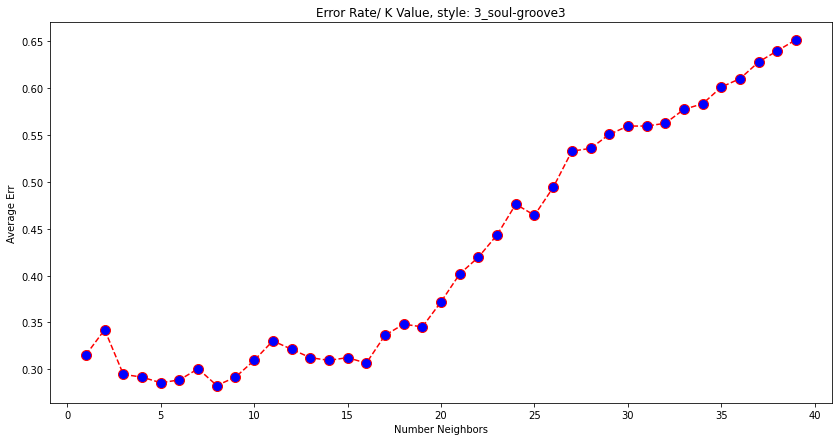

In [34]:
# %%capture my_out

err_rate = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    _ = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    err_rate.append(np.mean(y_pred != y_test))  # !!! what is this line doing?!

_ = plt.figure(figsize=(14, 7))
_ = plt.plot(range(1, 40), err_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
_ = plt.title('Error Rate/ K Value, style: {}'.format(style_filter))
_ = plt.xlabel('Number Neighbors')
_ = plt.ylabel('Average Err')

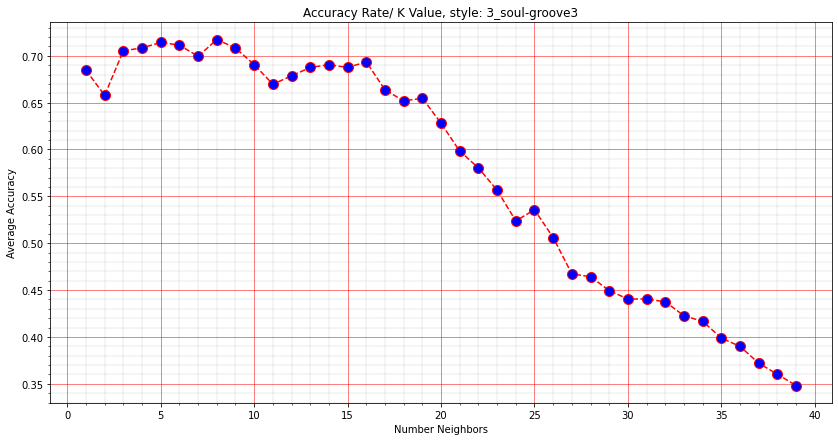

In [35]:
acc_rate = []

# Calculating accuracy for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    _ = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_rate.append(np.mean(y_pred == y_test))  # !!! what is this line doing?!


_ = plt.figure(figsize=(14, 7))
_ = plt.plot(range(1, 40), acc_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
_ = plt.title('Accuracy Rate/ K Value, style: {}'.format(style_filter))
_ = plt.xlabel('Number Neighbors')
_ = plt.ylabel('Average Accuracy')

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')


Note [this link](https://stackoverflow.com/q/41419864/9930522) helps explain the following ..

* np.mean(y_pred != y_test)

.. used in the calculations above, details follow ...

* 'y_pred', predicted array of classifications, e.g. [drummer1, drummer3]
* 'y_test', correct classifications, e.g. [drummer1, drummer5]
* 'y_pred != y_test', boolean array of comparisons, e.g. [ True, False]
* 'np.mean([True, False])', 1 true/ 2 total guesses = 1/2 = 0.5

Forumulas...
* Accuracy score = errors/ number of predictions (51/88=0.601714286)
* Error rate = correct responses / number of predictions (33/84=0.39285714)




# Linear SVC
Another possibly useful one according to the scikitlearn cheat sheet ..

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)



SVC accuracy score...
  SVC: 0.46726190476190477

SVC confusion matrix...

Confusion matrix...


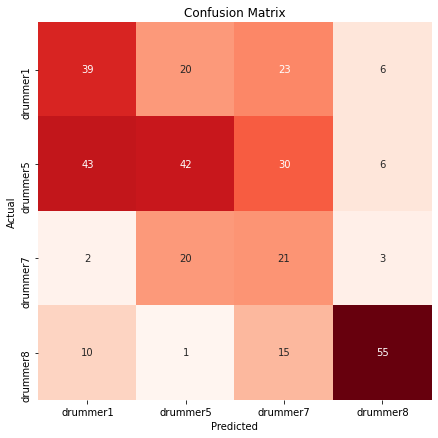

In [36]:



SVC_model = svm.SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

print('\n\nSVC accuracy score...')
print('  SVC: {}'.format(accuracy_score(SVC_prediction, y_test)))

print('\nSVC confusion matrix...')
# But Confusion Matrix and Classification Report give more details about performance
matrix1 = confusion_matrix(SVC_prediction, y_test)
#print(matrix1)

c_matrix(SVC_prediction, y_test, np.unique(y))



# Using pipelines

Refactoring code to be able to use python ML pipelines. Cross validation automation uses these, so this is handy. More here ...

* https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

* https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

## Create scaling and 1-hot transforms

In [37]:
# Make custom transformers for use in pipelines, those are handy 
# for doing cross validation automation

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Custom Transformer converts cols to one-hot encoding
class GetDummiesTransformer( BaseEstimator, TransformerMixin ):
    
  def __init__(self):
    return 
    
  # nothing to do 
  def fit( self, X, y = None ):
    return self
  
  # Do the transformer work
  def transform( self, X, y = None ):
    tmp_df = X.copy()

    # get dummies/ one-hot for categorical columns, join
    # the new columns with  original dataframe
    tmp_df = pd.concat([tmp_df,pd.get_dummies(tmp_df.note, prefix='note', drop_first=True)],axis=1)
    tmp_df.drop('note',axis=1, inplace=True)  # drop original 'note' col

    tmp_df = pd.concat([tmp_df,pd.get_dummies(tmp_df.bar_beat_number, prefix='beat', drop_first=True)],axis=1)
    tmp_df.drop('bar_beat_number',axis=1, inplace=True)  # drop original 'bar_beat_number' col

    return tmp_df

# Custom Transformer scales offset and velocity cols
class ScalingTransformer( BaseEstimator, TransformerMixin ):
    
  def __init__(self, scaling_style="m"):
    # scaling_style: 'm' = MinMax, 'r' = Robust
    self.scaling_style = scaling_style
    
  # nothing to do 
  def fit( self, X, y = None ):    
    return self
  
  # Do the transformer work
  def transform( self, X, y = None ):
    tmp_df = X.copy()

    # reshape our data in numpy_array
    velocity_x = tmp_df.velocity.values.reshape(-1, 1)
    offset_x = tmp_df.beat_offset.values.reshape(-1, 1)

    if self.scaling_style == 'm':  # min/max scaling
      print('... doing MinMax scaling transform')
      tmp_df['velocity_scaled'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(velocity_x)
      tmp_df['offset_scaled'] = MinMaxScaler(feature_range=(-0.5, 0.5)).fit_transform(offset_x)

    elif self.scaling_style =="r": # robust scaling      
      print('... doing Robust scaling transform')
      tmp_df['velocity_scaled'] = RobustScaler(quantile_range=(25, 75)).fit_transform(velocity_x)
      tmp_df['offset_scaled'] = RobustScaler(quantile_range=(25, 75)).fit_transform(offset_x)
    
    else:
      raise ValueError('Specified scaling not valid!!! - {}'.format(self.scaling_style))

    tmp_df.drop(columns=['velocity', 'beat_offset'], inplace=True)

    return tmp_df

In [38]:
target = all_data['drummer_ID'].to_numpy()
observations = all_data.drop(['drummer_ID' ], axis=1) #.to_numpy()

In [39]:
display(target)
display(observations.head())

array(['drummer1', 'drummer1', 'drummer1', ..., 'drummer8', 'drummer8',
       'drummer8'], dtype=object)

,note,velocity,beat_offset,bar_beat_number
0,hh,32,0,1
1,kick,60,0,1
2,snare,15,1,1
3,hh,18,0,2
4,hh,60,3,3


## Manual pipelines, 1 instance

In [59]:
print("Creating pipeline...")
my_pipe_1 = Pipeline(steps=[
                            ('dummies', GetDummiesTransformer()),
                            ('scaling', ScalingTransformer()),
                            ('knn', KNeighborsClassifier(7))
])

display(my_pipe_1)

Creating pipeline...


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [60]:

X_train, X_test, y_train, y_test = train_test_split(observations, target, test_size=0.20, random_state=27)

print('fitting the pipeline ...')
my_pipe_1.fit(X_train, y_train)

print('predicting ...')
predictions_1 = my_pipe_1.predict(X_test)

#print('predictions: {}'.format(predictions_1))

fitting the pipeline ...
... doing MinMax scaling transform


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

predicting ...
... doing MinMax scaling transform



KNN Accuracy score...
  KNN: 0.6488095238095238

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.73      0.61      0.67       113
    drummer5       0.69      0.60      0.64        95
    drummer7       0.43      0.69      0.53        55
    drummer8       0.77      0.74      0.76        73

    accuracy                           0.65       336
   macro avg       0.65      0.66      0.65       336
weighted avg       0.68      0.65      0.66       336


Confusion matrix...


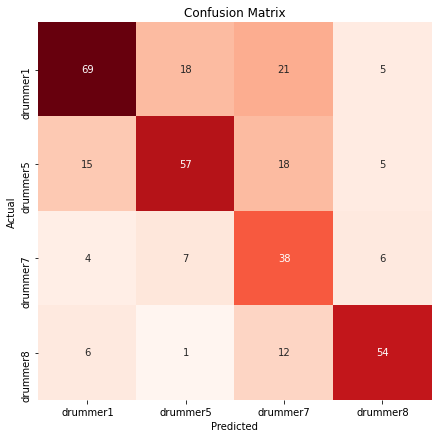

In [61]:
classes = np.unique(target)
KNN_results(predictions_1, y_test, classes)
c_matrix(predictions_1, y_test, classes)

## Manual pipelines, bulk loop

In [43]:
X_train, X_test, y_train, y_test = train_test_split(observations, target, test_size=0.20, random_state=27)


In [62]:

N_s = [1, 2, 5, 7, 9, 30]  # number of neighbors to test
preds = []  # store results

for i in N_s:
  print('predicting n = {}'.format(i))
  print("Creating pipeline...")
  pipe_2 = Pipeline(steps=[
                    ('dummies', GetDummiesTransformer()),
                    ('scaling', ScalingTransformer()),
                    ('knn', KNeighborsClassifier(i))
  ])
  print('fitting the pipeline ...')
  pipe_2.fit(X_train, y_train)
  print('predicting ...')
  preds.append((i, pipe_2.predict(X_test)))



predicting n = 1
Creating pipeline...
fitting the pipeline ...
... doing MinMax scaling transform


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

predicting ...
... doing MinMax scaling transform
predicting n = 2
Creating pipeline...
fitting the pipeline ...
... doing MinMax scaling transform


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

predicting ...
... doing MinMax scaling transform
predicting n = 5
Creating pipeline...
fitting the pipeline ...
... doing MinMax scaling transform


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

predicting ...
... doing MinMax scaling transform
predicting n = 7
Creating pipeline...
fitting the pipeline ...
... doing MinMax scaling transform


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

predicting ...
... doing MinMax scaling transform
predicting n = 9
Creating pipeline...
fitting the pipeline ...
... doing MinMax scaling transform


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=9, p=2,
                                      weights='uniform'))],
         verbose=False)

predicting ...
... doing MinMax scaling transform
predicting n = 30
Creating pipeline...
fitting the pipeline ...
... doing MinMax scaling transform


Pipeline(memory=None,
         steps=[('dummies', GetDummiesTransformer()),
                ('scaling', ScalingTransformer(scaling_style='m')),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=30, p=2,
                                      weights='uniform'))],
         verbose=False)

predicting ...
... doing MinMax scaling transform



_______________________________________________________

>> NEIGBORS = 1

KNN Accuracy score...
  KNN: 0.6547619047619048

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.66      0.63      0.65        98
    drummer5       0.65      0.59      0.62        92
    drummer7       0.51      0.62      0.56        73
    drummer8       0.84      0.81      0.83        73

    accuracy                           0.65       336
   macro avg       0.66      0.66      0.66       336
weighted avg       0.66      0.65      0.66       336


Confusion matrix...


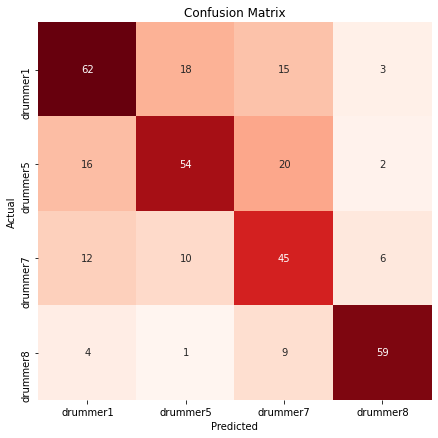


_______________________________________________________

>> NEIGBORS = 2

KNN Accuracy score...
  KNN: 0.6458333333333334

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.81      0.55      0.66       138
    drummer5       0.63      0.58      0.60        90
    drummer7       0.44      0.78      0.56        50
    drummer8       0.71      0.86      0.78        58

    accuracy                           0.65       336
   macro avg       0.65      0.69      0.65       336
weighted avg       0.69      0.65      0.65       336


Confusion matrix...


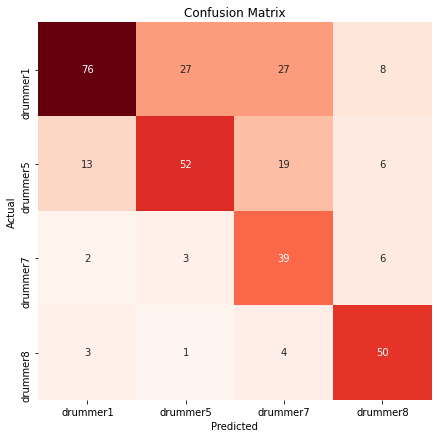


_______________________________________________________

>> NEIGBORS = 5

KNN Accuracy score...
  KNN: 0.6577380952380952

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.74      0.60      0.66       117
    drummer5       0.67      0.60      0.64        93
    drummer7       0.46      0.73      0.57        56
    drummer8       0.77      0.77      0.77        70

    accuracy                           0.66       336
   macro avg       0.66      0.68      0.66       336
weighted avg       0.68      0.66      0.66       336


Confusion matrix...


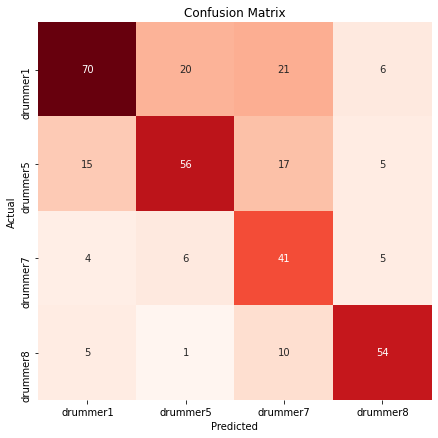


_______________________________________________________

>> NEIGBORS = 7

KNN Accuracy score...
  KNN: 0.6488095238095238

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.73      0.61      0.67       113
    drummer5       0.69      0.60      0.64        95
    drummer7       0.43      0.69      0.53        55
    drummer8       0.77      0.74      0.76        73

    accuracy                           0.65       336
   macro avg       0.65      0.66      0.65       336
weighted avg       0.68      0.65      0.66       336


Confusion matrix...


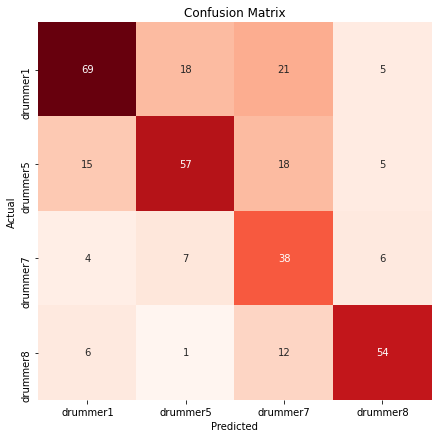


_______________________________________________________

>> NEIGBORS = 9

KNN Accuracy score...
  KNN: 0.6666666666666666

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.74      0.60      0.67       116
    drummer5       0.66      0.60      0.63        92
    drummer7       0.47      0.76      0.58        55
    drummer8       0.81      0.78      0.80        73

    accuracy                           0.67       336
   macro avg       0.67      0.69      0.67       336
weighted avg       0.69      0.67      0.67       336


Confusion matrix...


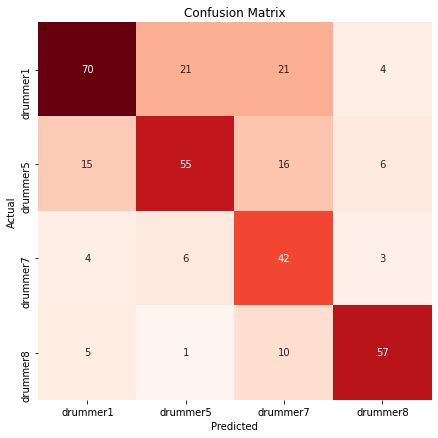


_______________________________________________________

>> NEIGBORS = 30

KNN Accuracy score...
  KNN: 0.44345238095238093

KNN classification report...
              precision    recall  f1-score   support

    drummer1       0.49      0.45      0.47       103
    drummer5       0.53      0.39      0.45       114
    drummer7       0.26      0.40      0.31        58
    drummer8       0.51      0.59      0.55        61

    accuracy                           0.44       336
   macro avg       0.45      0.45      0.44       336
weighted avg       0.47      0.44      0.45       336


Confusion matrix...


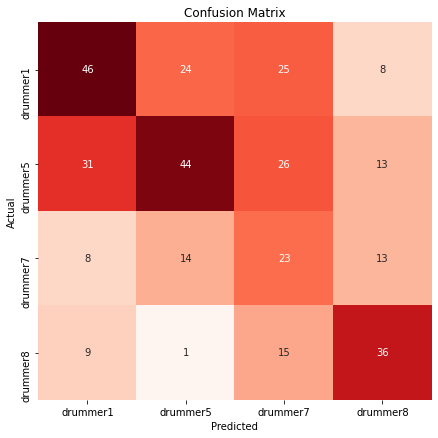

In [63]:
# view results

classes = np.unique(y)

for i, p in preds:
  print("\n_______________________________________________________")
  print("\n>> NEIGBORS = {}".format(i))
  KNN_results(p, y_test, classes)
  c_matrix(p, y_test, classes)

## K-fold cross validation

In [46]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

dummies_trans = GetDummiesTransformer()
scaled_trans = ScalingTransformer()
KNN_model = KNeighborsClassifier()

pipeline = make_pipeline(dummies_trans, scaled_trans, KNN_model)

kf = KFold(n_splits=10, shuffle=True, random_state=1)


cv_results = cross_val_score(pipeline,
                             observations,
                             target,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1
                             )



In [47]:
cv_results

print('\nmean: {}'.format(cv_results.mean()))

array([0.70238095, 0.69047619, 0.60714286, 0.67857143, 0.53571429,
       0.67261905, 0.61904762, 0.61676647, 0.62874251, 0.66467066])


mean: 0.6416132021670944


# File processing code template

In [48]:
# specify style being processed
style_filter = "1_funk-groove1"  

# iterate and process
for next_file in all_drummer_data.keys():
  perf_data = all_drummer_data[next_file]
  file_name = perf_data.file_wrapper.my_file_name
  df_1 = perf_data.tight_df
  if style_filter in file_name:
    print('data for: {}'.format(file_name))
  # end test loop


data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid
data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session/1_funk-groove1_138_beat_4-4.mid
data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session/1_funk-groove1_138_beat_4-4.mid
data for: /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer8/eval_session/1_funk-groove1_138_beat_4-4.mid
